In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [7]:
features = pd.DataFrame(cancer.data, columns = cancer.feature_names)
target = pd.DataFrame(cancer.target, columns = ["target"])

In [8]:
df = pd.concat([features, target], axis = 1)

In [9]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [10]:
correlation = df.corr('pearson')

In [11]:
correlation['target'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [12]:
X = df['worst concave points']   #dataframe - df
Y = df['target']
Z = df['worst perimeter']

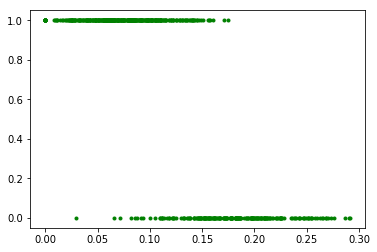

In [13]:
#data visualization(plotting)
plt.plot(X, Y, 'g.')

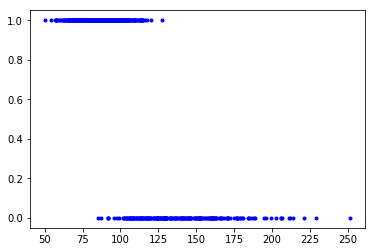

In [14]:
plt.plot(Z, Y, 'b.')

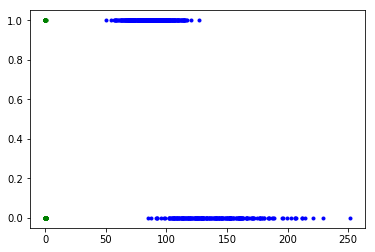

In [15]:
plt.plot(X, Y, 'g.',
         Z, Y, 'b.')

In [16]:
x = np.array(X)
y = np.array(Y)
z = np.array(Z)

In [17]:
#normalization
x = (x - x.min()) / (x.max() - x.min())
z = (z - z.min()) / (z.max() - z.min())

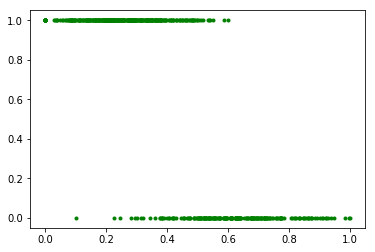

In [18]:
plt.plot(x, y, 'g.')

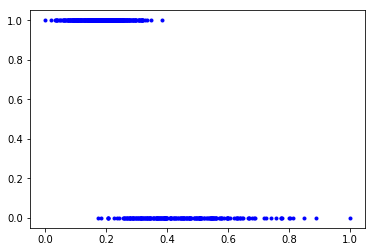

In [19]:
plt.plot(z, y, 'b.')

In [20]:
x_train, x_test, z_train, z_test, y_train, y_test = train_test_split(x, z, y, test_size = 0.25)

In [21]:
def hypothesis(a, x, b, z, c):
    return 1 / (1 + np.exp(- ( a * x + b * z + c)))

In [22]:
def error(a, x, b, z, c, y):
    e = 0
    m = len(x)
    
    for i in range(m):
        e += -(y[i] * np.log(hypothesis(a, x[i], b, z[i], c))) - ((1 - y[i]) * np.log(1 - hypothesis(a, x[i], b, z[i], c)))
        
    return (1/ m) * e    

In [23]:
def step_gradient(a, x, b, z, c, y, learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    
    m = len(x)
    
    for i in range(m):
        grad_a += (hypothesis(a, x[i], b, z[i], c) - y[i]) * x[i]
        grad_b += (hypothesis(a, x[i], b, z[i], c) - y[i]) * z[i]
        grad_c += (hypothesis(a, x[i], b, z[i], c) - y[i])
         
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)               
    
    return a, b, c

In [24]:
def descend(init_a, x, init_b, z, init_c, y, learning_rate, iterations):
    a = init_a
    b = init_b
    c = init_c
    
    for i in range(iterations):
        e = error(a, x, b, z, c, y)
        
        if i % 1000 == 0:
            print(f"error: {e}, a:{a}, b:{b}, c:{c}")
            
        a, b, c = step_gradient(a, x, b, z, c, y, learning_rate)
        
    return a, b, c     

In [25]:
init_a = 0
init_b = 0
init_c = 0
iterations = 10000
learning_rate = 0.1

In [26]:
final_a, final_b, final_c = descend(init_a, x_train, init_b, z_train, init_c, y_train, learning_rate, iterations)

error: 0.6931471805599468, a:0, b:0, c:0
error: 0.10601049883403242, a:-15.033863103624782, b:-29.83245803627175, c:15.799465646206139
error: 0.10600944089493122, a:-15.068808410308867, b:-29.983401506982343, c:15.860077363276394
error: 0.10600943783668278, a:-15.07070452728455, b:-29.991526607284296, c:15.86334709671714
error: 0.1060094378276977, a:-15.070807342031351, b:-29.99196704589433, c:15.863524354793206
error: 0.10600943782767118, a:-15.070812917471287, b:-29.991990929609237, c:15.863533967031566
error: 0.10600943782767112, a:-15.070813219817612, b:-29.99199222478004, c:15.863534488286057
error: 0.10600943782767126, a:-15.070813236213333, b:-29.991992295014875, c:15.863534516552772
error: 0.10600943782767133, a:-15.070813237102438, b:-29.991992298823607, c:15.863534518085633
error: 0.10600943782767128, a:-15.07081323715066, b:-29.991992299030155, c:15.86353451816876


In [27]:
final_a, final_b, final_c

(-15.070813237153272, -29.991992299041364, 15.863534518173271)

In [28]:
error(final_a, x_train, final_b, z_train, final_c, y_train)

0.10600943782767122

In [29]:
error(final_a, x_test, final_b, z_train, final_c, y_test)

1.0755054687712198

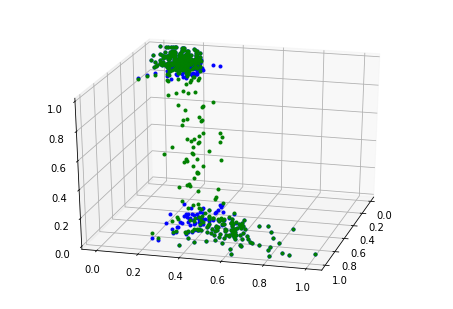

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(25,15)
ax.plot(x_train, z_train, y_train, "b.")
ax.plot(x_train, z_train, hypothesis(final_a, x_train, final_b, z_train, final_c), "g.")


In [31]:
def accuracy(a, x, b, z, c, y):
    correct = 0
    m = len(x)
    
    for i in range(m):
        pred = hypothesis(a, x[i], b, z[i], c)
        
        if pred > 0.5:
            z_1 = 1
        else:
            z_1 = 0
            
        if y[i] == z_1:
            correct += 1
            
    print(f"Accuracy: {correct/len(y)}")        

In [32]:
accuracy(final_a, x_train, final_b, z_train, final_c, y_train)

Accuracy: 0.9507042253521126


In [33]:
accuracy(final_a, x_test, final_b, z_test, final_c, y_test)

Accuracy: 0.9300699300699301
